In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex
import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline

In [6]:
#list_of_tickers = ["MJ", 'SPY']
#end_date= datetime.now()
#start_date= end_date + timedelta(-365)
#tickers_df= get_historical_data(list_of_tickers, start_date, end_date, output_format="pandas", columns='close')
#tickers_df.head()

In [7]:
#read aggregate data csv
aggregate_df= pd.read_csv("aggregate_data.csv")
aggregate_df.set_index(pd.to_datetime(aggregate_df['date'], infer_datetime_format=True), inplace=True)
aggregate_df.drop(columns=['date'], inplace=True)
agg_df_asc= aggregate_df.sort_index(ascending= True)
agg_df_asc.head()

,BOOZ,SMOK,MJ,XBI,XPH,SPY
date,,,,,,
2016-09-19,98.87,83.69,29.457,65.89,46.00,213.41
2016-09-20,99.61,84.02,29.457,67.51,46.12,213.42
2016-09-21,101.36,85.08,29.457,68.28,46.27,215.82
2016-09-22,102.83,85.97,30.460,68.83,46.56,217.18
2016-09-23,102.85,85.75,30.170,68.14,46.91,215.99


In [8]:
#tickers_df.to_csv("MJ_index_data")

In [9]:
#tickers_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
#tickers_df.head()

In [10]:
#calculate 2 year returns for indexes and drop nulls
df_daily_returns = agg_df_asc.pct_change().dropna()
df_daily_returns.head()

,BOOZ,SMOK,MJ,XBI,XPH,SPY
date,,,,,,
2016-09-20,0.007485,0.003943,0.000000,0.024586,0.002609,0.000047
2016-09-21,0.017569,0.012616,0.000000,0.011406,0.003252,0.011245
2016-09-22,0.014503,0.010461,0.034050,0.008055,0.006268,0.006302
2016-09-23,0.000194,-0.002559,-0.009521,-0.010025,0.007517,-0.005479
2016-09-26,0.000194,-0.020292,0.000000,-0.005430,-0.026220,-0.008102


In [11]:
# Calculate Sharpe Ratio
sharpe_ratios = (df_daily_returns.mean() * 756) / (df_daily_returns.std() * np.sqrt(756))
sharpe_ratios

BOOZ    0.268030
SMOK   -0.768188
MJ      0.004573
XBI     0.711276
XPH    -0.416935
SPY     1.647644
dtype: float64

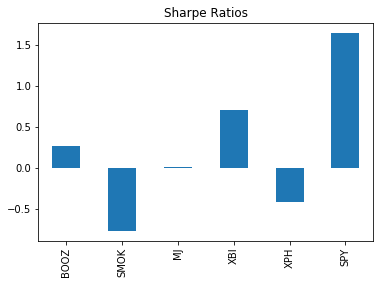

In [12]:
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

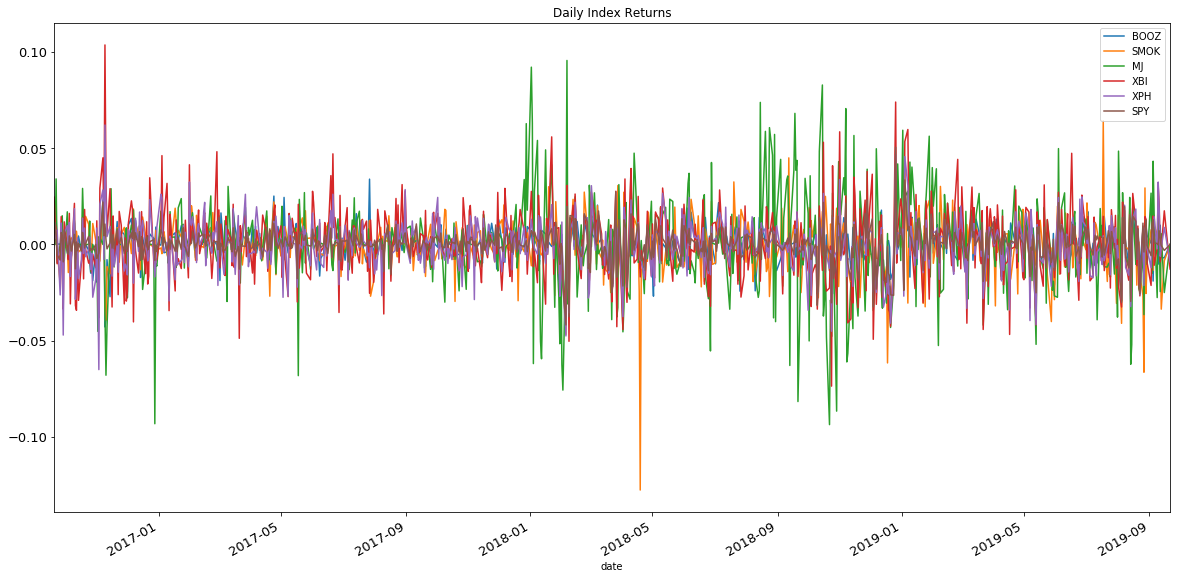

In [13]:
# Plot daily retuns for indexes
df_daily_returns.plot(figsize=(20,10), title= "Daily Index Returns", fontsize=13);

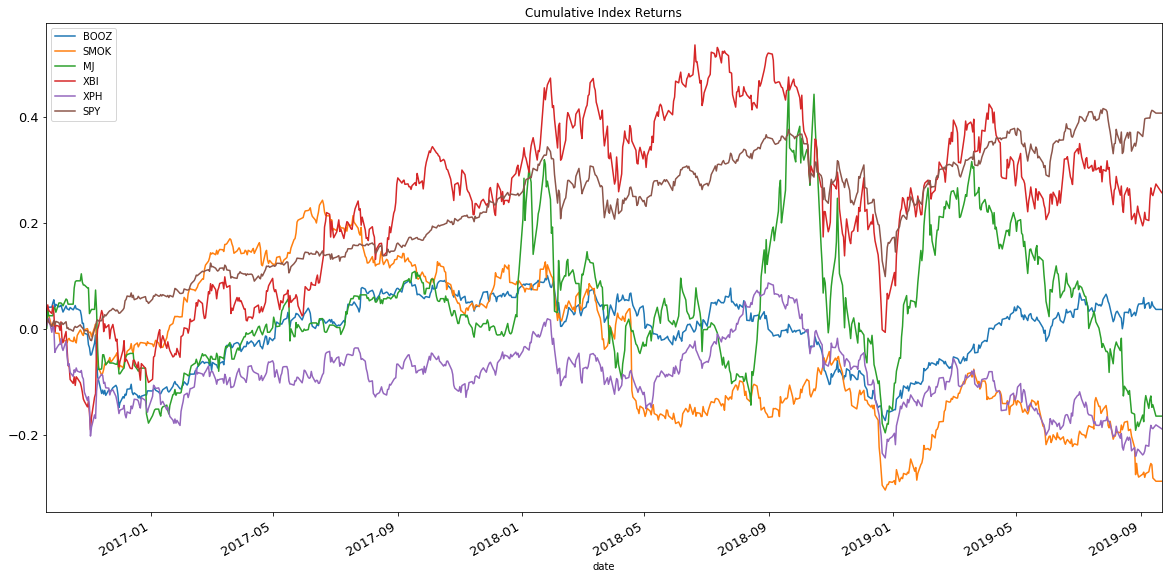

In [14]:
# Plot cumulative returns for the indexes
cumulative_returns_indexes = (1 + df_daily_returns).cumprod() - 1
cumulative_returns_indexes.plot(figsize=(20,10), title= "Cumulative Index Returns", fontsize=13);


In [15]:
#HV plot of cumulative returns
cumulative_returns_indexes.hvplot.line(ylabel= "cumulative returns", xlabel= "date")

:NdOverlay   [Variable]
   :Curve   [date]   (value)

# 20, 50, 100 day moving averages of MJ

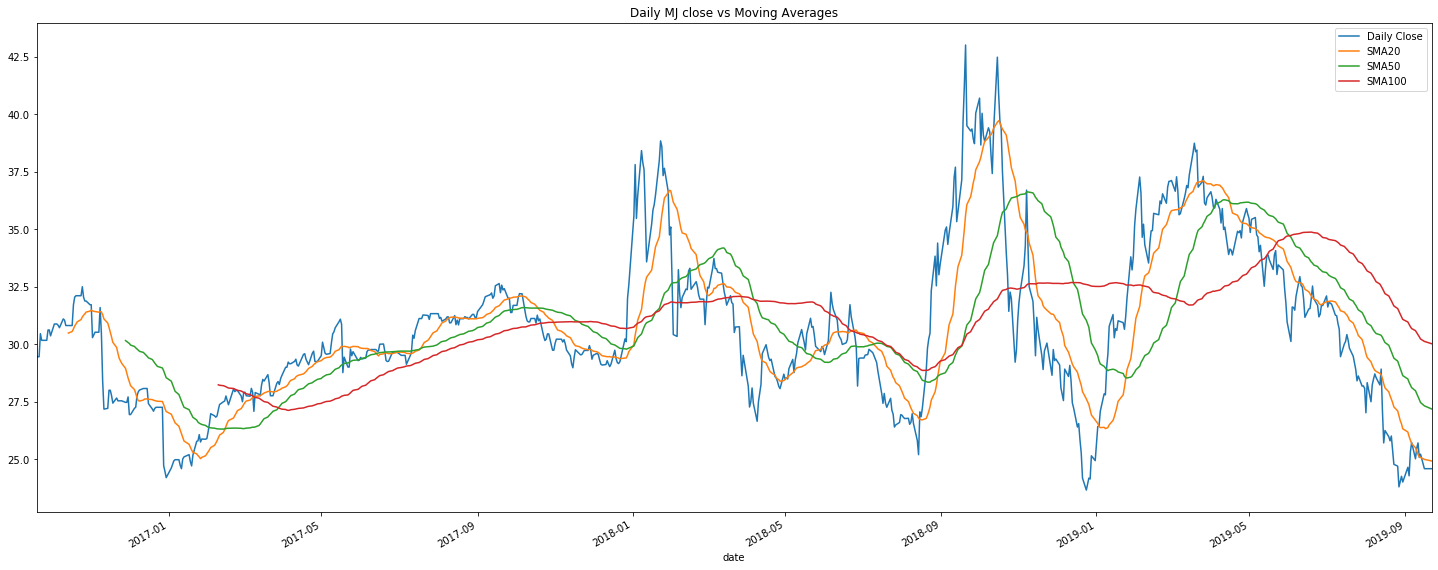

In [16]:
#20, 50,100 day SMA of MJ
mj_sma_20 = agg_df_asc["MJ"].rolling(window=20).mean()
mj_sma_50 = agg_df_asc["MJ"].rolling(window=50).mean()
mj_sma_100 = agg_df_asc["MJ"].rolling(window=100).mean()
axes = agg_df_asc['MJ'].plot(figsize=(25,10), title= "Daily MJ close vs Moving Averages")
mj_sma_20.plot(ax=axes)
mj_sma_50.plot(ax=axes)
mj_sma_100.plot(ax=axes)
axes.legend(["Daily Close", "SMA20", "SMA50", "SMA100"]);

In [17]:
# Daily Standard Deviations if indexes
# Calculate the standard deviation for each portfolio. 
indexes_daily_std= cumulative_returns_indexes.std()
indexes_daily_std.sort_values(ascending=False)

XBI     0.163155
SMOK    0.137695
MJ      0.117036
SPY     0.111516
BOOZ    0.063705
XPH     0.062148
dtype: float64

In [18]:
annualized_std_indexes = indexes_daily_std * np.sqrt(252)
annualized_std_indexes

BOOZ    1.011293
SMOK    2.185848
MJ      1.857890
XBI     2.590008
XPH     0.986565
SPY     1.770265
dtype: float64

In [19]:
correlation= agg_df_asc.corr()
correlation

,BOOZ,SMOK,MJ,XBI,XPH,SPY
BOOZ,1.000000,0.305083,0.218449,0.453539,0.275505,0.318264
SMOK,0.305083,1.000000,-0.041690,-0.334894,0.279037,-0.562516
MJ,0.218449,-0.041690,1.000000,0.451009,0.414439,0.393592
XBI,0.453539,-0.334894,0.451009,1.000000,0.423882,0.831621
XPH,0.275505,0.279037,0.414439,0.423882,1.000000,0.073947
SPY,0.318264,-0.562516,0.393592,0.831621,0.073947,1.000000


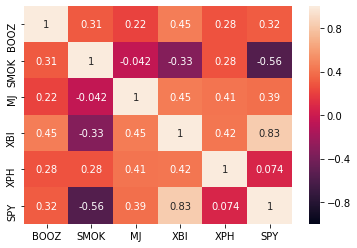

In [20]:
#Correlation heat map
import seaborn as sns
corr_all = agg_df_asc.corr()
sns.heatmap(corr_all, xticklabels=corr_all.columns.values, vmin=-1, vmax=1,
            yticklabels=corr_all.columns.values, annot= True)

In [21]:
#daily returns pct change
df_daily_returns.head()

,BOOZ,SMOK,MJ,XBI,XPH,SPY
date,,,,,,
2016-09-20,0.007485,0.003943,0.000000,0.024586,0.002609,0.000047
2016-09-21,0.017569,0.012616,0.000000,0.011406,0.003252,0.011245
2016-09-22,0.014503,0.010461,0.034050,0.008055,0.006268,0.006302
2016-09-23,0.000194,-0.002559,-0.009521,-0.010025,0.007517,-0.005479
2016-09-26,0.000194,-0.020292,0.000000,-0.005430,-0.026220,-0.008102


# Calculate Volatility

In [22]:
#annualized volatility
volatility = df_daily_returns.std() * np.sqrt(252)
volatility

BOOZ    0.141347
SMOK    0.207236
MJ      0.350061
XBI     0.283631
XPH     0.204419
SPY     0.128754
dtype: float64

In [23]:
#calculate average daily returns of each index
avg_daily_return_booz = df_daily_returns.mean()['BOOZ']
avg_daily_return_smok = df_daily_returns.mean()['SMOK']
avg_daily_return_mj = df_daily_returns.mean()['MJ']
avg_daily_return_xbi = df_daily_returns.mean()['XBI']
avg_daily_return_xph = df_daily_returns.mean()['XPH']
avg_daily_return_spy = df_daily_returns.mean()['SPY']
print("BOOZ average daily return is", avg_daily_return_booz)
print("SMOK average daily return is", avg_daily_return_smok)
print("MJ average daily return is", avg_daily_return_mj)
print("XBI average daily return is", avg_daily_return_xbi)
print("XPI average daily return is", avg_daily_return_xph)
print("SPY average daily return is", avg_daily_return_spy)

BOOZ average daily return is 8.679804971413078e-05
SMOK average daily return is -0.0003647300203599301
MJ average daily return is 3.66795916561003e-06
XBI average daily return is 0.0004622016905746064
XPI average daily return is -0.00019526748493822746
SPY average daily return is 0.00048603052609922916


In [24]:
#calculate daily std dev of indexes
std_dev_daily_return_booz = df_daily_returns.std()['BOOZ']
std_dev_daily_return_smok = df_daily_returns.std()['SMOK']
std_dev_daily_return_mj = df_daily_returns.std()['MJ']
std_dev_daily_return_xbi = df_daily_returns.std()['XBI']
std_dev_daily_return_xph = df_daily_returns.std()['XPH']
std_dev_daily_return_spy = df_daily_returns.std()['SPY']
print("BOOZ volatility is", std_dev_daily_return_booz)
print("SMOK volatility is", std_dev_daily_return_smok)
print("MJ volatility is", std_dev_daily_return_mj)
print("XBI volatility is", std_dev_daily_return_xbi)
print("XPH volatility is", std_dev_daily_return_xph)
print("SPY volatility is", std_dev_daily_return_spy)


BOOZ volatility is 0.008904031055788826
SMOK volatility is 0.013054637625755917
MJ volatility is 0.022051761164075038
XBI volatility is 0.017867101297148497
XPH volatility is 0.012877218060406787
SPY volatility is 0.008110748686137108


In [25]:
#show the final closigprices
booz_last_price = aggregate_df['BOOZ'][0]
smok_last_price = aggregate_df['SMOK'][0]
mj_last_price = aggregate_df['MJ'][0]
xbi_last_price = aggregate_df['XBI'][0]
xph_last_price = aggregate_df['XPH'][0]
spy_last_price = aggregate_df['SPY'][0]
print(booz_last_price)
print(smok_last_price)
print(mj_last_price)
print(xbi_last_price)
print(xph_last_price)
print(spy_last_price)

102.44
59.58
24.59
82.79
37.3
300.16


In [26]:
# Setup the Monte Carlo Parameters 500msimulations over 2 years
number_simulations = 2000
number_records = 252 * 2
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [27]:
# Run the Monte Carlo Simulation
for n in range(number_simulations):
    
    #initialize simulation
    simulated_mj_prices = [mj_last_price]
    simulated_booz_prices = [booz_last_price]
    #simulated_smok_prices = [smok_last_price]
    
    # Simulate the returns
    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        simulated_mj_price = simulated_mj_prices[-1] * (1 + np.random.normal(avg_daily_return_mj, std_dev_daily_return_mj))
        simulated_booz_price = simulated_booz_prices[-1] * (1 + np.random.normal(avg_daily_return_booz, std_dev_daily_return_booz))
        #simulated_smok_price = simulated_smok_prices[-1] * (1 + np.random.normal(avg_daily_return_smok, std_dev_daily_return_smok))
       
        # Append the simulated price to the list
        simulated_mj_prices.append(simulated_mj_price)
        simulated_booz_prices.append(simulated_booz_price)
        #simulated_smok_prices.append(simulated_smok_price)
    
        
    monte_carlo["MJ prices"] = pd.Series(simulated_mj_prices)
    monte_carlo["BOOZ prices"] = pd.Series(simulated_booz_prices)
    #monte_carlo["SMOK prices"] = pd.Series(simulated_smok_prices)
    #print(monte_carlo)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = monte_carlo.pct_change()
   
    # Set the portfolio weights50/50
    weight = [.5, .5]
    portfolio_daily_return= simulated_daily_returns.dot(weight)
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_return.fillna(0)).cumprod()
portfolio_cumulative_returns.tail()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
500,1.316437,1.112818,1.196841,0.877847,0.866394,1.129707,0.645878,1.061838,0.972793,1.250220,...,1.036667,0.972636,0.912215,1.012059,1.331982,0.989609,1.605603,1.417604,0.738185,1.224382
501,1.325634,1.088678,1.196632,0.856304,0.874887,1.130565,0.634672,1.064504,0.962455,1.235089,...,1.035603,0.970476,0.914427,1.011672,1.310946,1.002910,1.575493,1.410997,0.731387,1.237765
502,1.327598,1.067332,1.217626,0.866692,0.857766,1.112440,0.631070,1.074853,0.946813,1.236433,...,1.030115,0.956297,0.922794,1.011159,1.318738,1.026639,1.576374,1.450712,0.723144,1.240456
503,1.310228,1.085637,1.213275,0.864750,0.865888,1.124107,0.635959,1.083959,0.918963,1.244337,...,1.028796,0.955386,0.923688,1.012914,1.316978,1.037487,1.585699,1.437667,0.725659,1.219868
504,1.328840,1.064049,1.200487,0.870869,0.871376,1.111647,0.627419,1.091779,0.932421,1.228750,...,1.040284,0.978386,0.928487,1.036197,1.308028,1.062043,1.596440,1.459527,0.718430,1.219441


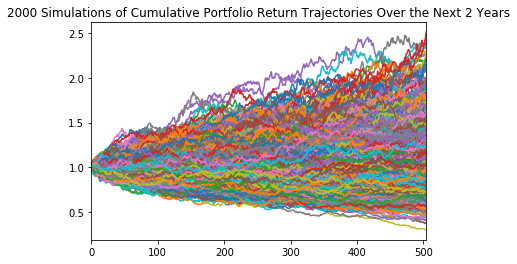

In [28]:
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 2 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

### MJ INDEX Monte Carlo simulation

In [29]:
# Monte carlo for MJ index 500 simulations in 2 years

mj_sim_df= pd.DataFrame()

for n in range(number_simulations):
    
    #initialize simulation
    simulated_mj_prices_index = [mj_last_price]

    for i in range(number_records):
        # Calculate the simulated price using the last price within the list
        mj_sim_price = simulated_mj_prices_index[-1] * (1 + np.random.normal(avg_daily_return_mj, std_dev_daily_return_mj))
        # Append the simulated price to the list
        simulated_mj_prices_index.append(mj_sim_price)
    
    # Create a DataFrame of the simulated prices
    #simulated_price_df = pd.DataFrame({
        #"Simulated MJ Prices": simulated_mj_prices
        #})

    # Print head of DataFrame
    mj_sim_df[f"Simulation {n+1}"]= pd.Series(simulated_mj_prices_index)
mj_sim_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 1991,Simulation 1992,Simulation 1993,Simulation 1994,Simulation 1995,Simulation 1996,Simulation 1997,Simulation 1998,Simulation 1999,Simulation 2000
0,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,...,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000,24.590000
1,24.747530,23.809003,24.489557,24.976750,25.486126,24.417872,23.900864,25.080269,24.635513,25.491367,...,25.110546,24.634644,25.275815,23.787023,24.718688,25.090021,24.096473,24.746774,24.338024,25.352165
2,25.884044,24.590129,25.298149,25.940284,25.290670,24.739396,24.175646,25.872920,23.762966,25.624185,...,25.192117,25.485465,25.358242,24.611106,25.412729,25.422192,24.525821,25.251527,24.716535,26.418709
3,25.021011,24.793210,24.427224,24.955819,26.236337,24.547399,24.302329,24.570345,23.735068,25.808119,...,25.047075,25.651826,25.266961,24.726567,25.432504,25.660900,23.999525,24.967542,23.553190,26.572329
4,25.115664,25.415922,24.953808,24.633856,25.764445,25.077997,23.751846,23.643411,24.258511,25.635588,...,24.389233,25.159564,24.383618,25.223224,26.648930,23.820453,23.831455,24.688228,23.385162,26.436720


In [30]:
print(std_dev_daily_return_mj)

0.022051761164075038


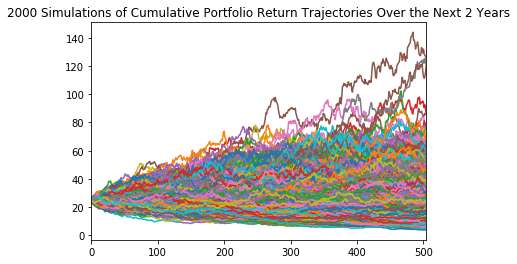

In [31]:
#Simulated stock price trajectory for MJ
plot_title_mj = f"{n+1} Simulations of MJ Cumulative Portfolio Return Trajectories Over the Next 2 Years"
mj_sim_df.plot(legend=None, title=plot_title)

In [32]:
# Select the end of year for MJ simulation
simulated_end_yr1 = mj_sim_df.iloc[252, :]
simulated_end_yr1.head()

Simulation 1    28.597820
Simulation 2    32.927602
Simulation 3    18.298775
Simulation 4    22.129443
Simulation 5    28.007310
Name: 252, dtype: float64

In [33]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval_yr1 = simulated_end_yr1.quantile(q=[0.025, 0.975])
confidence_interval_yr1

0.025    11.808443
0.975    47.329565
Name: 252, dtype: float64

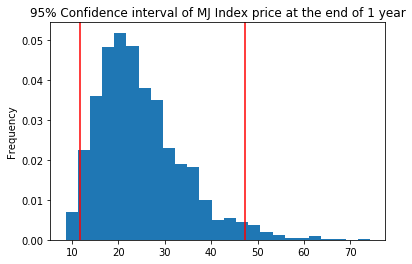

In [47]:
#Simulated returns at 1 year with 95% confidence interval
simulated_end_yr1.plot(kind='hist', title= "95% Confidence interval of MJ Index price at the end of 1 year", density=True, bins=25)
plt.axvline(confidence_interval_yr1.iloc[0], color='r')
plt.axvline(confidence_interval_yr1.iloc[1], color='r')

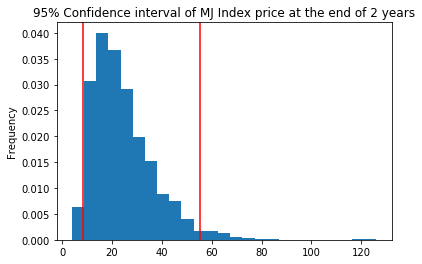

In [48]:
# Select the end of year 2 for MJ simulation and confidence interval
simulated_end_yr2 = mj_sim_df.iloc[-1, :]
confidence_interval_yr2 = simulated_end_yr2.quantile(q=[0.025, 0.975])
simulated_end_yr2.plot(kind='hist', title= "95% Confidence interval of MJ Index price at the end of 2 years", density=True, bins=25)
plt.axvline(confidence_interval_yr2.iloc[0], color='r')
plt.axvline(confidence_interval_yr2.iloc[1], color='r')
#simulated_end_yr2.head()

In [36]:
#Daily returs of simulated stock price
#simulated_mj_daily_returns = mj_sim_df.pct_change()
#simulated_mj_daily_returns.head()

In [37]:
#cumulative returns of simulated MJ stock prices
#simulated_mj_cumulative_returns = (1 + mj_sim_df).cumprod()
#simulated_mj_cumulative_returns.head()


### Calculate the Cumulative Profits/Losses of Simulated Stock Prices for MJ Index

In [38]:
# Multiply an initial investment of 10,000 by the cumulative returns of simulative stock prices to
# return the progression of cumulative returns in terms of money
#initial_investment = 10000
#cumulative_pnl = initial_investment * mj_sim_df
#cumulative_pnl.head()

In [39]:
#cumulative_pnl.plot(figsize= (15,8), title= "Cumulative P&L of $10,000 invested in 10 years")

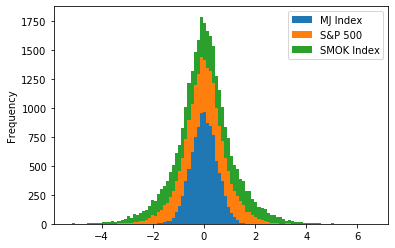

In [40]:
std_dev_daily_return_mj = np.random.normal(scale=0.5, size=10000)
std_dev_daily_return_spy = np.random.normal(scale=1.0, size=10000)
std_dev_daily_return_smok = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "MJ Index": std_dev_daily_return_mj,
    "S&P 500": std_dev_daily_return_spy,
    "SMOK Index": std_dev_daily_return_smok
})

portfolio_std.plot.hist(stacked=True, bins=100)

In [99]:
weed_use_df= pd.read_csv("../group_project_1/data_files/weed_use_2017.csv")
weed_use_df.set_index('State')
#weed_use_df['18-25']= weed_use_df['18-25'].astype(str)



#piviz plotly

,Order,Population,18-25,26+,18+
State,,,,,
Alabama,6,430500,0.26,0.08,0.11
Alaska,7,63500,0.39,0.21,0.23
Arizona,8,637200,0.30,0.12,0.14
Arkansas,9,265200,0.27,0.10,0.13
California,10,3697900,0.37,0.15,0.18
Colorado,11,492600,0.49,0.22,0.26
Connecticut,12,297600,0.45,0.12,0.16
Delaware,13,78500,0.37,0.12,0.15
District of Columbia,14,64200,0.53,0.22,0.27


In [94]:
weed_use_df.drop(columns= ["Order","26+", "18+"], inplace=True)

KeyError: "['Order' '26+' '18+'] not found in axis"

In [100]:
weed_use_df['18-25']= weed_use_df['18-25'].astype(float)

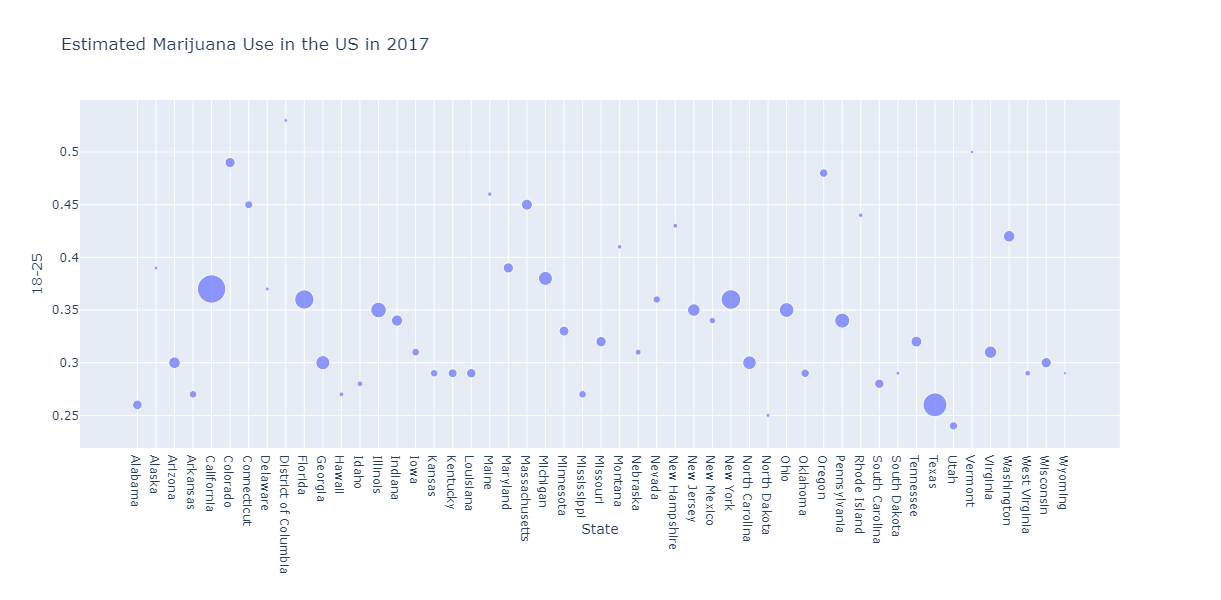

In [111]:
px.scatter(weed_use_df, x='State', y='18-25', size='Population', title="Estimated Marijuana Use in the US in 2017")
